In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
# setting no lomit for the max columns to display, for easier investigation 
pd.options.display.max_columns = None

df = pd.read_csv('Complete_Dataset_updated.csv')
df.head()

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index
0,7/6/2022,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,44744,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516
1,7/6/2022,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,44744,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516
2,7/6/2022,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,44744,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646
3,7/6/2022,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,44744,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646
4,7/6/2022,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,44744,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806


In [139]:
df.isna().sum().sum()

np.int64(0)

In [140]:
df['Date'] = pd.to_datetime(df['Date'])

# the dates are in Excel date format, so we need to turn into datetime objects
df['Satellite_Images_Dates'] = pd.to_datetime(df['Satellite_Images_Dates'], origin='1899-12-30', unit='D')

df['Satellite_Images_Dates'] = df['Satellite_Images_Dates'].dt.strftime('%Y-%m-%d')
df[['Date', 'Satellite_Images_Dates']]

,Date,Satellite_Images_Dates
0,2022-07-06,2022-07-02
1,2022-07-06,2022-07-02
2,2022-07-06,2022-07-02
3,2022-07-06,2022-07-02
4,2022-07-06,2022-07-02
...,...,...
307,2023-03-01,2023-02-27
308,2023-03-01,2023-02-27
309,2023-03-01,2023-02-27
310,2023-03-01,2023-02-27


# Descriptive Statistics

### Measures of Frequency

In [141]:
df['Sample_type'].value_counts()

Sample_type
Q1    42
Q4    42
Q3    42
S1    42
S2    42
Q2    40
G1    20
G2    18
G3    12
G4    12
Name: count, dtype: int64

In [142]:
# commulative sum of the rainfall values
df['Rainfall'].value_counts().cumsum()

Rainfall
0.0     174
0.4     212
2.0     232
0.8     248
0.6     264
3.3     276
18.4    288
2.9     300
2.5     312
Name: count, dtype: int64

In [143]:
df['DOY'].value_counts()

DOY
125    20
307    20
96     20
215    18
286    18
342    18
13     16
153    16
187    16
40     16
251    14
138    12
202    12
236    12
173    12
110    12
320    12
348    12
333    12
26     12
60     12
Name: count, dtype: int64

In [144]:
# relative frequency of DOY
relative_freq_doy = df['DOY'].value_counts() / len(df)
relative_freq_doy

DOY
125    0.064103
307    0.064103
96     0.064103
215    0.057692
286    0.057692
342    0.057692
13     0.051282
153    0.051282
187    0.051282
40     0.051282
251    0.044872
138    0.038462
202    0.038462
236    0.038462
173    0.038462
110    0.038462
320    0.038462
348    0.038462
333    0.038462
26     0.038462
60     0.038462
Name: count, dtype: float64

In [153]:
grouped_date_rainfall = df.groupby('Date')['Rainfall'].sum().reset_index() # reset_index() to turn the groupby object into a DataFrame
grouped_date_rainfall.columns = ['Date', 'Total Rainfall']
grouped_date_rainfall

,Date,Total Rainfall
0,2022-04-06,40.0
1,2022-04-20,0.0
2,2022-05-05,0.0
3,2022-05-18,0.0
4,2022-06-02,0.0
5,2022-06-22,220.8
6,2022-07-06,0.0
7,2022-07-21,0.0
8,2022-08-03,0.0
9,2022-08-24,0.0


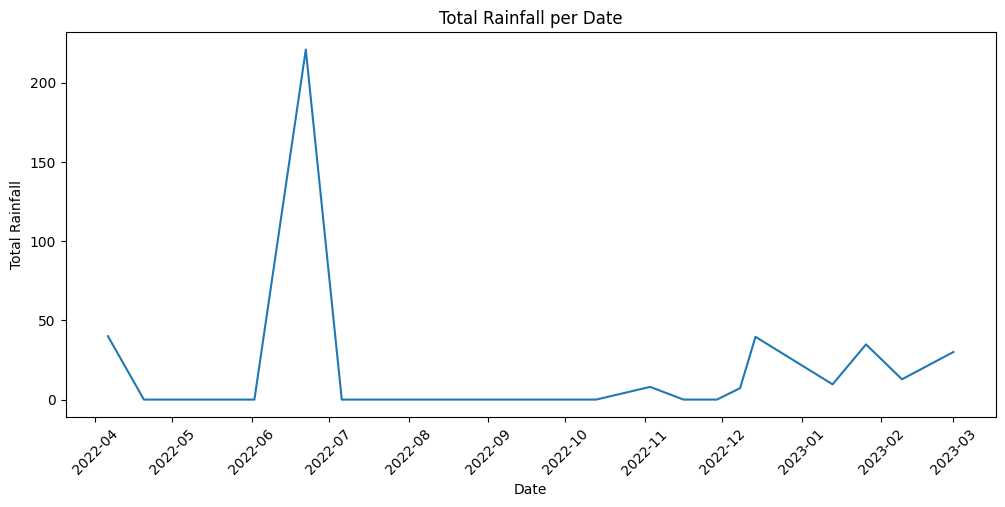

In [146]:
plt.figure(figsize=(12, 5))
plt.plot(grouped_date_rainfall['Date'], grouped_date_rainfall['Total Rainfall'])
plt.xlabel('Date')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall per Date')
plt.xticks(rotation=45)
plt.show()

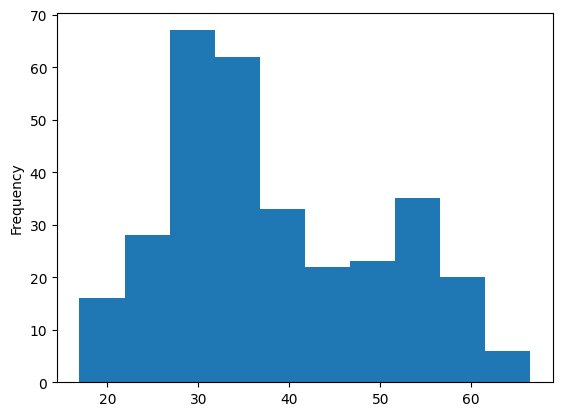

In [147]:
df['DM'].plot(kind='hist')
plt.show()

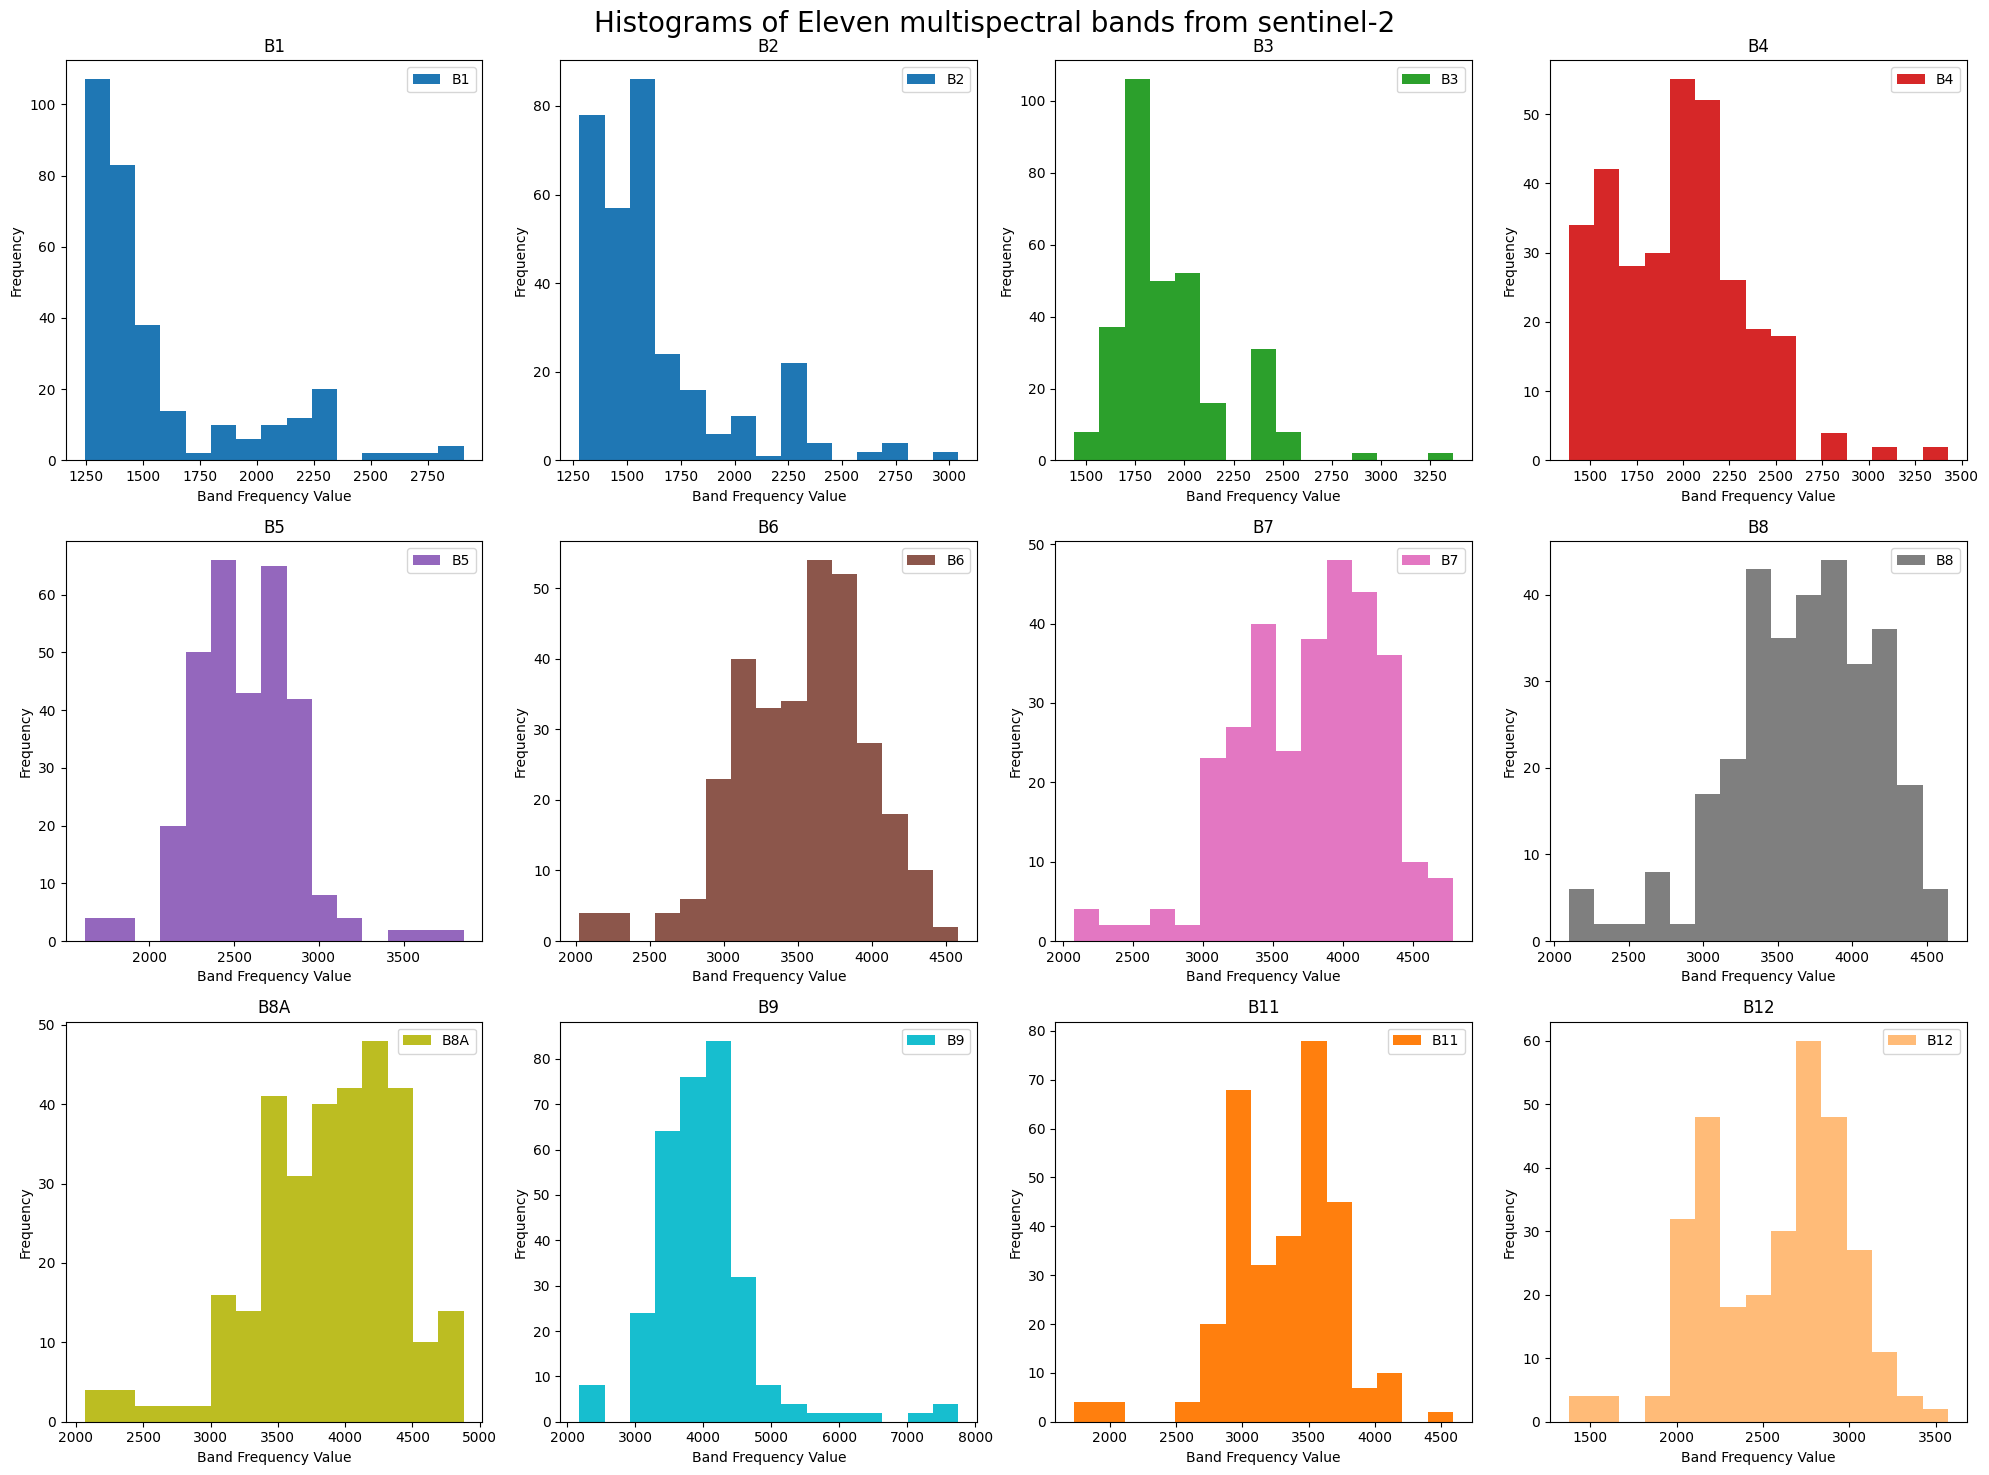

In [148]:
# analysis of Eleven multispectral bands from sentinel-2 
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']
# colors for each band
colors = {
    'B1': '#1f77b4',  # Coastal and Aerosol Band (Blue)
    'B2': '#1f77b4',  # Blue Band
    'B3': '#2ca02c',  # Green Band
    'B4': '#d62728',  # Red Band
    'B5': '#9467bd',  # Visible and Near Infrared (NIR) Band
    'B6': '#8c564b',  # Red Edge Band
    'B7': '#e377c2',  # Red Edge Band
    'B8': '#7f7f7f',  # NIR Band
    'B8A': '#bcbd22', # Narrow NIR Band
    'B9': '#17becf',  # Water Vapour Band
    'B11': '#ff7f0e', # Short Wave Infrared (SWIR) Band
    'B12': '#ffbb78'  # Short Wave Infrared (SWIR) Band
}
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

for i, band in enumerate(bands):
    row = i // 4
    col = i % 4
    axs[row, col].hist(df[band], bins=15, label=band, color=colors[band])
    axs[row, col].set_title(band)
    axs[row, col].set_xlabel('Band Frequency Value')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].legend()

fig.suptitle('Histograms of Eleven multispectral bands from sentinel-2', fontsize=20)
plt.tight_layout()
plt.show()

### Measures of Central Tendency

In [149]:
df.drop(['Date', 'Sample_type', 'Satellite_Images_Dates'], axis=1).var()

DOY                                1.117707e+04
Sample                             2.034437e+03
Sub-Sample                         2.508039e-01
Lat                                9.798142e-08
Long_                              1.240211e-07
Animals                            1.973782e-01
DM                                 1.347535e+02
MM                                 2.813881e+00
Biomass                            1.075833e+07
NDF                                8.245575e+01
ADF                                4.717753e+01
CP                                 7.648560e+00
TDN_based_ADF                      2.862926e+01
TDN_based_NDF                      1.434503e+01
B1                                 1.401804e+05
B2                                 1.118977e+05
B3                                 7.821662e+04
B4                                 1.230647e+05
B5                                 1.000289e+05
B6                                 2.035287e+05
B7                                 2.561

### Measures of Dispersion

### Measures of Position

### Outlier Detection

### Insights

lorem impsome 

### Relationships Between Features
#### Contingency Table

### Visualizations

### Interpreting the Statistical and Visual Analyses

# Predictive Analytics

### Feature Selection

#### 1. First Technique

#### 2. Second Technique

#### 3. Third Technique

### Models Comparison

In [150]:
# Mean Absolute Error (MAE)

# R-squared (R²)

Analyze which model provides the most accurate and reliable predictions for biomass production

### Visiualizing Predicitve Analysis

# Perspective Analytics